<a href="https://colab.research.google.com/github/GeorgeDavila/OpenCV_Rave/blob/main/changeHueOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenCV References: https://docs.opencv.org/master/df/d9d/tutorial_py_colorspaces.html
https://answers.opencv.org/question/178766/adjust-hue-and-saturation-like-photoshop/


Stackoverflow references:
For hue shifting  https://stackoverflow.com/questions/62648862/how-can-i-change-the-hue-of-a-certain-area-with-opencv-python

For gif making 
https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python

## Upload Your Image and save as input_image.png (Pick only 1 option, either local device or URL, not both or last option chosen will be image used)

### Upload Image from local device 

In [1]:
%cd '/content/'

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Remove any previous input_image.png
!rm input_image.png

#Rename the uploaded image to input_image.png so we can just work with that name throughout 
import os

user_filename = '{name}'.format(name=fn)
os.system("mv " + user_filename + " input_image.png")

original_filename = str(user_filename).split(".")[0] #removes file type suffix by removing everything after dot "."
print(original_filename)


print('User uploaded file "{name}" should be renamed to input_image.png'.format(
      name=fn))

/content


Saving inca_llama_square_yellowonblack.png to inca_llama_square_yellowonblack.png
User uploaded file "inca_llama_square_yellowonblack.png" with length 28000 bytes
rm: cannot remove 'input_image.png': No such file or directory
inca_llama_square_yellowonblack
User uploaded file "inca_llama_square_yellowonblack.png" should be renamed to input_image.png


### Upload Image from URL

In [ ]:
#Form to upload from url 
source_url = '' #@param {type:"string"}

from PIL import Image
from urllib.request import urlopen

#Remove any previous input_image.png
!rm input_image.png

if source_url is not None and source_url !='':
    im1 = Image.open(urlopen(source_url))
    #save the image 
    im1 = im1.save("input_image.png")
else:
    print('Provide an image url and try again.')

Provide an image url and try again.


# Change Hue

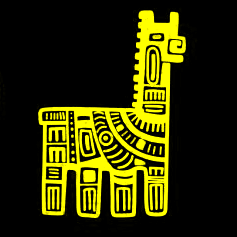

In [2]:
#Show image in notebook 
from IPython.display import Image
Image(filename='input_image.png') 

**Hue in OpenCV:**
H,S,V = Hue , Saturation, Value (ie color value) parameters
Hue has range [0,179] , Saturation has range [0,255] , Value has range [0,255] although these ranges can differ in different software (or even in a opencv-based program if someone rescales them or something) 

**Set Parameter values here before running Main**. Should see changes in color as you change color_step

In [3]:
#Form for parameters
#@title Parameters  

#@markdown Number of steps traveled in Hue parameter for each frame. Greater step value = greater color variation in each frame. 0 step = no change. 1 = slow change, 2 slightly faster, etc 
color_step = 10 #@param {type: "slider", min: 0, max: 179}
#^Hue param max difference is 179, hence the max
#0 = no change, really just included becasue slider seems to be buggy if we start at 1 

#@markdown Duration of each frame of the gif in Milliseconds:
duration_parameter = 10  #@param {type: "slider", min: 10, max: 1000, step: 10}
#^duration of each frame of the gif in milliseconds 

#@markdown Loop parameter = number of times gif loops. 0 = loops infinitely. 
loop_parameter = 0  #@param {type: "slider", min: 0, max: 100}

#watermarked = True #@param {type:"boolean"} 
#^enable to add watermark

## **Main (make all hues and turn into gif)**

In [4]:
#Hue list structure. Play with this if you want to do something neat (maybe randomize order, invert direction by starting at 179 and going down, etc Size shouldnt matter, just keep it integers in range 0 to 179)
#Can even write your own like [3,1,4,1,5,9,2,6,5,...] or whatever and write it here manually MAKE SURE TO SORT OUT NAMING IF YOU HAVE REPEAT NUMBERS CURRENTLY WILL JUST OVERWRITE
#Also whatever you make it redefine it below as well (or remove that one )

if color_step == 0:
  my_hue_list = [0]
else:
  my_hue_list = list( range(0, 180, color_step) ) #Color step basically gives step range of this list, ie if color_step = 2 then it is [0,2,4,6,....,178]
#180 at end means highest it can go is 179 (same as hue param )
#including 0 makes original image part of the outputs/gif 
print(my_hue_list)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]


***Transparency in png's***

Alpha channels are basically the degree of transparency in a png. Only applicable to png's so we comment them out here 
  
If you want to preserve transparent parts please uncomment all the alpha channel parts AND RELATED VARIABLES like **bgra**. And in the final line of the for loop: cv2.imwrite(output_filename, bgr_new), change bgr_new to this **bgra**  variable. 

(also cant even have it as a capital .PNG, has to be lowercase) 

In [5]:
%rm /content/main_outputs/*
%mkdir '/content/main_outputs/'
%cd '/content/main_outputs/'

#^use IPython command percent sign to move into appropriate directory can also add output directory to output filenames 
import cv2
import numpy as np

user_image_name = "/content/input_image.png"

# load image with alpha channel
img = cv2.imread( user_image_name , cv2.IMREAD_UNCHANGED)

# extract alpha channel  
#alpha = img[:,:,3]

# extract bgr channels
bgr = img[:,:,0:3]

# convert to HSV
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
#h = hsv[:,:,0]
#s = hsv[:,:,1]
#v = hsv[:,:,2]
h,s,v = cv2.split(hsv)


if color_step == 0:
  my_hue_list = [0]
else:
  my_hue_list = list( range(0, 180, color_step) ) #Color step basically gives step range of this list, ie if color_step = 2 then it is [0,2,4,6,....,178]
#180 at end means highest it can go is 179 (same as hue param )
#including 0 makes original image part of the outputs/gif 
print(my_hue_list)

#H,S,V = Hue , Saturation, Value (ie color value) parameters
#Hue has range [0,179] , Saturation [0,255] , Value [0,255]

for i in my_hue_list:
  # modify hue channel by adding difference and modulo 180 (modulo because hue parameter only goes up to index 180, shouldn't exceed that )
  hnew = np.mod(h + i, 180).astype(np.uint8)   #<<<<<<<<<<<<<<<< where the iter comes in 

  # recombine channels
  hsv_new = cv2.merge([hnew,s,v])

  # convert back to bgr
  bgr_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2BGR)

  # put alpha back into bgr_new
  #bgra = cv2.cvtColor(bgr_new, cv2.COLOR_BGR2BGRA)
  #bgra[:,:,3] = alpha

  # save output AS FILE LABELED BY ITERABLE 
  output_filename = 'output_bgr_new_' + str(i) +'.png'        #<<<<<<<<<<<<<<<< where the iter comes in 
  cv2.imwrite(output_filename, bgr_new)



#Return to main directory so this cell doesn't interfere with others 
%cd '/content/'

# Display various images to see the steps
#CAN use cv2 imshow method if running locally but not great on colab notebook, so use IPython method 

from IPython.display import Image

for i in my_hue_list:
  output_filename = 'output_bgr_new_' + str(i) +'.png'        #<<<<<<<<<<<<<<<< where the iter comes in 
  Image(filename='/content/main_outputs/' + output_filename) 

rm: cannot remove '/content/main_outputs/*': No such file or directory
/content/main_outputs
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
/content


##**Make gif (Run Main before running this)**

In [7]:
import glob
from PIL import Image

# filepaths
fp_in = "/content/main_outputs/*.png"
fp_out = "/content/" + original_filename + "_HueShiftGIF_color_step_" + str(color_step) + "_duration_" + str(duration_parameter) + "_loop_" + str(loop_parameter) + ".gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=duration_parameter, loop=loop_parameter)

#copy for easy viewing (0's so it appears at top)
import os
os.system("cp " + fp_out + " 00_MOST_RECENT_GIF_00.gif")
os.system("cp " + fp_out + " /content/main_outputs/" + original_filename + "_HueShiftGIF_color_step_" + str(color_step) + "_duration_" + str(duration_parameter) + "_loop_" + str(loop_parameter) + ".gif") 
#^Puts a copy into the folder to be ZIP downloaded 

0

## Easily Download All Generated Hue Images and GIF as ZIP file

In [8]:
!cd /content/main_outputs/
#Zip the images into single file then download that zipped file 

#label zip file with parameters used
zip_filename = original_filename + "_HueShiftGIF_color_step_" + str(color_step) + "_duration_" + str(duration_parameter) + "_loop_" + str(loop_parameter) + ".zip"

import os #run system command 
os.system("zip -r /content/" + zip_filename + " main_outputs")

from google.colab import files
files.download( "/content/"+ zip_filename ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Reference Code

### Singular Hue Shift Example

mkdir: cannot create directory ‘/content/singular_shift_outputs/’: File exists
/content/singular_shift_outputs
/content


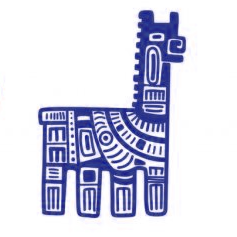

In [ ]:
%mkdir '/content/singular_shift_outputs/'
%cd '/content/singular_shift_outputs/'

import cv2
import numpy as np

user_image = "/content/input_image.png"

# load image with alpha channel
img = cv2.imread( user_image , cv2.IMREAD_UNCHANGED)

# extract alpha channel
alpha = img[:,:,3]

# extract bgr channels
bgr = img[:,:,0:3]

#H,S,V = Hue , Saturation, Value (ie color value) parameters
#Hue has range [0,179] , Saturation [0,255] , Value [0,255]


# convert to HSV
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
#h = hsv[:,:,0]
#s = hsv[:,:,1]
#v = hsv[:,:,2]
h,s,v = cv2.split(hsv)

# purple is 276 in range 0 to 360; so half in OpenCV
# green is 120 in range 0 to 360; so half in OpenCV
purple = 138
green = 60

# diff color (green - hue)
diff_color = green - purple

# modify hue channel by adding difference and modulo 180
hnew = np.mod(h + diff_color, 180).astype(np.uint8)

# recombine channels
hsv_new = cv2.merge([hnew,s,v])

# convert back to bgr
bgr_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2BGR)

# put alpha back into bgr_new
bgra = cv2.cvtColor(bgr_new, cv2.COLOR_BGR2BGRA)
bgra[:,:,3] = alpha

# save output
cv2.imwrite('output_alpha.png', alpha)
cv2.imwrite('output_bgr.png', bgr)
cv2.imwrite('output_bgr_new.png', bgr_new)
cv2.imwrite('output_green.png', bgra)

# Display various images to see the steps
#CAN use cv2 imshow method if running locally but not great on colab notebook, so use IPython method 
#cv2.imshow('alpha',alpha)
#cv2.imshow('bgr',bgr)
#cv2.imshow('bgr_new',bgr_new)
#cv2.imshow('bgra',bgra)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#Show image in notebook 

#Return to main directory so this cell doesn't interfere with others 
%cd '/content/'

from IPython.display import Image
Image(filename='/content/singular_shift_outputs/output_bgr_new.png') 



### Multiple Hue Shift Example 

Set Parameter values here. Should see changes in color as you change color_step

In [ ]:
#Form for parameters  
number_Of_Frames = 60  #@param {type: "slider", min: 1, max: 120}
#^Number of frames/hues to go through

color_step = 23 #@param {type: "slider", min: 1, max: 179}
#^Number of steps travel in Hue parameter for each frame. Hue param max difference is 179, hence the max

#watermarked = True #@param {type:"boolean"} 
#^enable to add watermark

/content/multiple_shift_outputs
/content


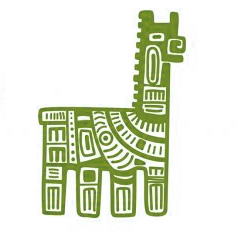

In [ ]:
%mkdir '/content/multiple_shift_outputs/'
%cd '/content/multiple_shift_outputs/'

#^use IPython command percent sign to move into appropriate directory can also add output directory to output filenames 
import cv2
import numpy as np

user_image_name = "/content/input_image.png"

# load image with alpha channel
img = cv2.imread( user_image_name , cv2.IMREAD_UNCHANGED)

# extract alpha channel
alpha = img[:,:,3]

# extract bgr channels
bgr = img[:,:,0:3]

#H,S,V = Hue , Saturation, Value (ie color value) parameters
#Hue has range [0,179] , Saturation [0,255] , Value [0,255]


# convert to HSV
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
#h = hsv[:,:,0]
#s = hsv[:,:,1]
#v = hsv[:,:,2]
h,s,v = cv2.split(hsv)

# modify hue channel by adding difference and modulo 180
hnew = np.mod(h + color_step, 180).astype(np.uint8)

# recombine channels
hsv_new = cv2.merge([hnew,s,v])

# convert back to bgr
bgr_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2BGR)

# put alpha back into bgr_new
bgra = cv2.cvtColor(bgr_new, cv2.COLOR_BGR2BGRA)
bgra[:,:,3] = alpha

# save output
cv2.imwrite('output_alpha.png', alpha)
cv2.imwrite('output_bgr.png', bgr)
cv2.imwrite('output_bgr_new.png', bgr_new)
cv2.imwrite('output_green.png', bgra)


#Return to main directory so this cell doesn't interfere with others 
%cd '/content/'

# Display various images to see the steps
#CAN use cv2 imshow method if running locally but not great on colab notebook, so use IPython method 

from IPython.display import Image
Image(filename='/content/multiple_shift_outputs/output_bgr_new.png') 